In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
train = pd.read_csv(r'D:\Python\bike-sharing-demand\train.csv')
test = pd.read_csv(r'D:\Python\bike-sharing-demand\test.csv')

## 分別確認train和test的資料集有無缺漏或異常

In [81]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [82]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [474]:
datetimecol = test['datetime']

## 無遺失值，先將兩資料合併並視覺化看有無須調整之資料

In [83]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [84]:
train.dtypes.value_counts()

int64      8
float64    3
object     1
dtype: int64

In [85]:
train.apply(pd.Series.nunique, axis=0)

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [86]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [87]:
test.apply(pd.Series.nunique, axis=0)

datetime      6493
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           65
humidity        79
windspeed       27
dtype: int64

In [88]:
dataTypeDf = pd.DataFrame(data.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
dataTypeDf.head()

,variableType,count
0,int64,8
1,float64,6
2,object,1
3,datetime64[ns],1
4,float32,1


## temp, atemp, humidity, windspeed, count的項次較多

In [89]:
y_shape = train.shape[0]

In [90]:
data = train.append(test)

In [91]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']

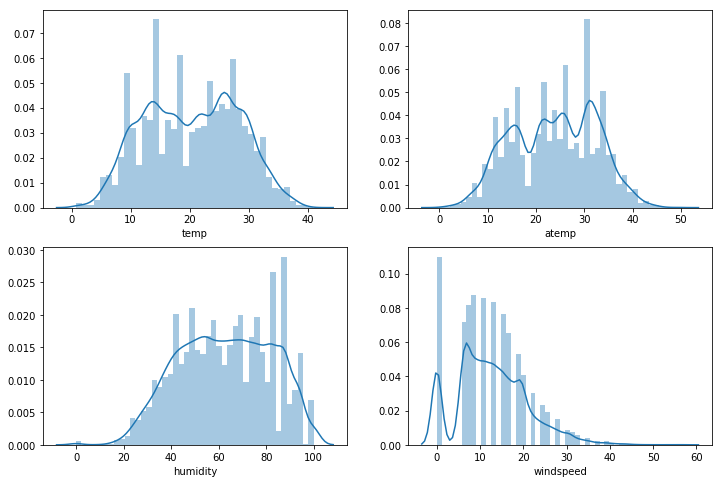

In [92]:
plt.figure(figsize=(12, 8))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    sns.distplot(data[col])

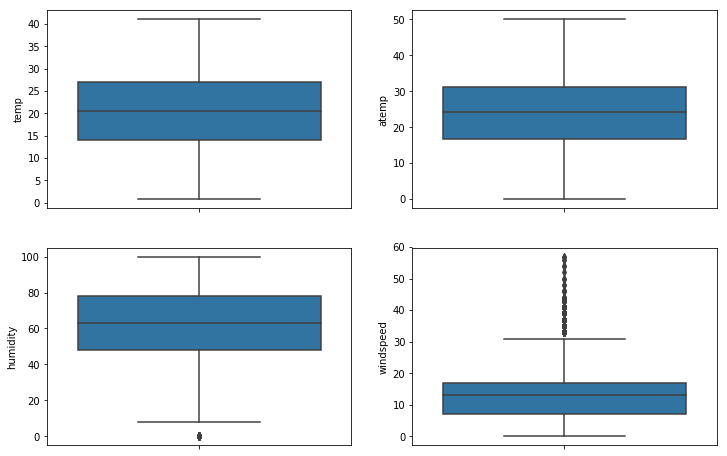

In [93]:
plt.figure(figsize=(12, 8))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    sns.boxplot(data[col], orient='v')

## humidity跟windspeed有離群值，需要處裡，先看看humidity的數值

### 在最一開始的統計圖有發現，humidity最小值為零，有點不合理
### humidity應該是連續變量，故可先將為0的數值當作缺失值，再用前後值去填補

In [94]:
data[data['humidity']==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3.0,0.0,3.0
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0.0,2.0,2.0
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0.0,1.0,1.0
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1.0,2.0,3.0
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0.0,12.0,12.0
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1.0,36.0,37.0
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1.0,43.0,44.0
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1.0,23.0,24.0
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0.0,17.0,17.0
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6.0,5.0,11.0


### 連為零之項也是連續分布，代表此區資料收集時應有缺失

#### 跟其他數值一起畫出來看看前後段趨勢

In [95]:
data['humidity'].replace([0], [None], inplace=True)

In [99]:
data['humidity'].isnull().sum()

22

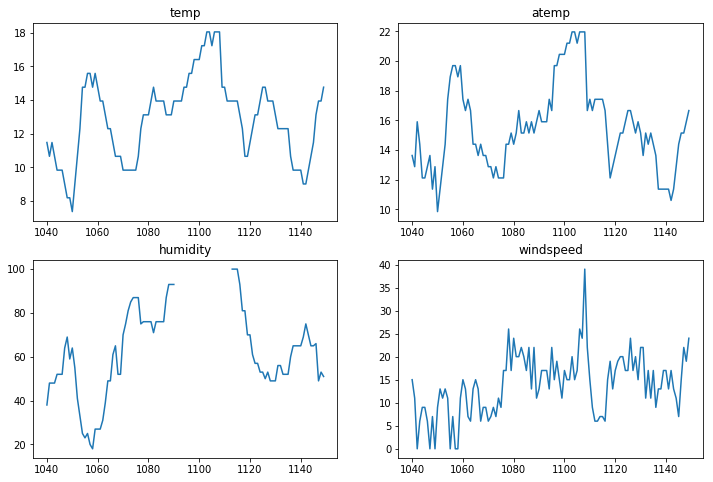

In [97]:
plt.figure(figsize=(12, 8))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    plt.title(col)
    plt.plot(data[col][1040:1150])

#### 從其他數據來看，這區段的資料應都是向上分布的

#### 來看humidity前後段資料分布吧！

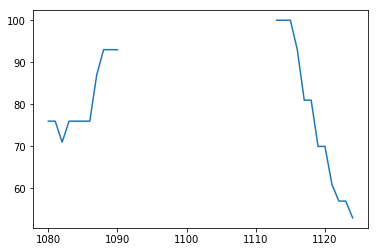

In [100]:
plt.plot(data['humidity'][1080:1125])

In [101]:
data['humidity'][1090:1114]

1090      93
1091    None
1092    None
1093    None
1094    None
1095    None
1096    None
1097    None
1098    None
1099    None
1100    None
1101    None
1102    None
1103    None
1104    None
1105    None
1106    None
1107    None
1108    None
1109    None
1110    None
1111    None
1112    None
1113     100
Name: humidity, dtype: object

#### 從93到100，可以用np.linspace來填補

In [102]:
data['humidity'][1091:1113] = pd.Series(np.linspace(93, 100, 22))

C:\Users\Master\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 再看一次

In [103]:
data['humidity'][1090:1114]

1090            93
1091     93.000000
1092     93.333333
1093     93.666667
1094     94.000000
1095     94.333333
1096     94.666667
1097     95.000000
1098     95.333333
1099     95.666667
1100     96.000000
1101     96.333333
1102     96.666667
1103     97.000000
1104     97.333333
1105     97.666667
1106     98.000000
1107     98.333333
1108     98.666667
1109     99.000000
1110     99.333333
1111     99.666667
1112    100.000000
1113           100
Name: humidity, dtype: object

In [104]:
data['humidity'] = data['humidity'].astype('float32')

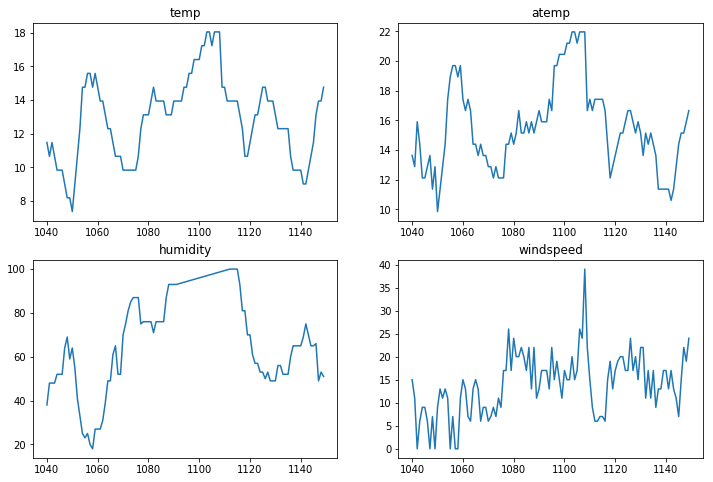

In [105]:
plt.figure(figsize=(12, 8))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    plt.title(col)
    plt.plot(data[col][1040:1150])

#### 再來處理windspeed

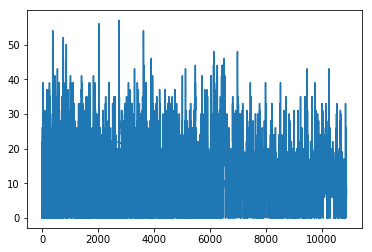

In [106]:
plt.plot(data['windspeed'])

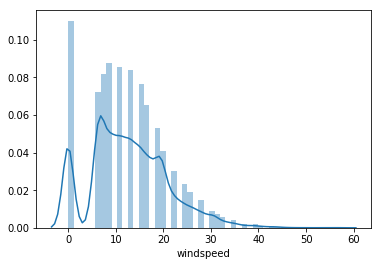

In [107]:
sns.distplot(data['windspeed'])

#### 先看目前未處裡前的相關係數！

In [108]:
train_pre = data.iloc[:y_shape, :]

In [109]:
train_pre.corr()['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.328872
Name: count, dtype: float64

### 跟風速的相關係數較低!

#### 上網搜尋體感溫度資料時，發現體感溫度與溫度、風速與濕度有關，故可以以此公式來推算風速資料，風速資料才會呈現連續值

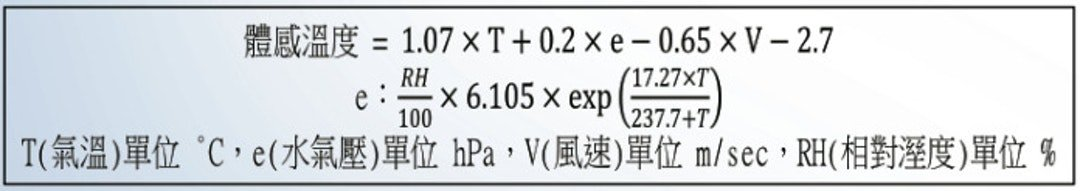

In [110]:
data['windspeed'] = (1.07*data['temp'] + 0.2*data['humidity']/100*6.105*np.exp((17.27*data['temp'])/(273.7+data['temp'])))/0.65

### 那再看一次修改後的相關係數吧！

In [111]:
train_pre = data.iloc[:y_shape, :]
train_pre.corr()['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
windspeed     0.363975
season        0.163439
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.328872
Name: count, dtype: float64

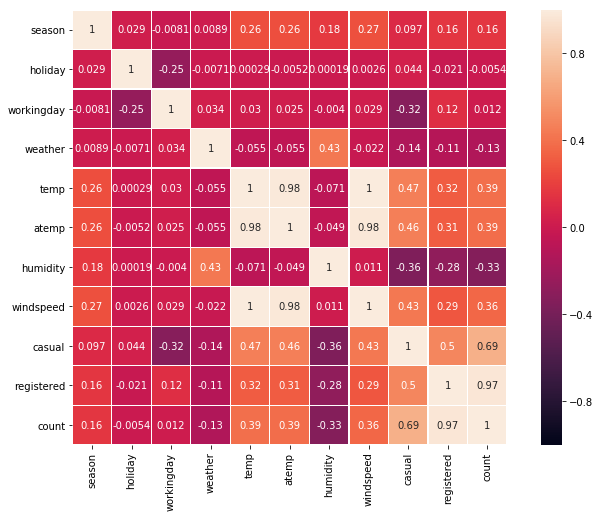

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_pre.corr(), annot=True, square=True, linewidths=0.2, vmax=1, vmin=-1, linecolor='w')

### 風速的相關係數有上升！看來這樣處裡對整體數據表現應有助益！

### 但從相關係數圖表中發現，跟season, weather, holiday, workingday好像沒什麼關係，來看看吧！

### 先處裡一下datetime資料再去比較上述四項之數值

In [113]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [115]:
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data['week'] = data['datetime'].dt.dayofweek
data['year'] = data['datetime'].dt.year
data['date'] = data['datetime'].dt.date

In [149]:
train_pre = data.iloc[:y_shape, :]

### 觀察溫度走勢(train data)

#### 先by日/月處裡

In [237]:
graph_date_day = train_pre.groupby(['year', 'month', 'date'], as_index=False).agg({'week':'min', 'temp':'median', 'atemp':'median', 'humidity':'median', 'windspeed':'median'})
graph_date_month = train_pre.groupby(['year', 'month'], as_index=False).agg({'date':'min', 'week':'min', 'temp':'median', 'atemp':'median', 'humidity':'median', 'windspeed':'median'})

In [238]:
graph_date_day.head(10)

,year,month,date,week,temp,atemp,humidity,windspeed
0,2011,1,2011-01-01,5,15.99,20.0750,80.0,30.300592
1,2011,1,2011-01-02,6,14.76,17.4250,71.0,27.524508
2,2011,1,2011-01-03,0,8.20,9.8500,44.0,14.802294
3,2011,1,2011-01-04,1,9.02,11.3650,59.0,16.510433
4,2011,1,2011-01-05,2,9.02,11.3650,40.0,16.380070
5,2011,1,2011-01-06,3,8.20,11.3650,51.0,15.330036
6,2011,1,2011-01-07,4,8.20,9.8500,47.0,14.740207
7,2011,1,2011-01-08,5,6.97,8.7125,53.0,13.416004
8,2011,1,2011-01-09,6,5.74,5.6825,44.5,10.640785
9,2011,1,2011-01-10,0,5.74,6.8200,50.0,11.029144


In [240]:
graph_date_month.head(10)

,year,month,date,week,temp,atemp,humidity,windspeed
0,2011,1,2011-01-01,0,8.20,9.850,51.0,14.864381
1,2011,2,2011-02-01,0,9.84,12.880,49.5,18.732360
2,2011,3,2011-03-01,0,13.94,15.910,60.5,25.246529
3,2011,4,2011-04-01,0,17.22,21.210,67.0,31.844846
4,2011,5,2011-05-01,0,21.32,25.000,77.0,40.854393
5,2011,6,2011-06-01,0,27.88,31.820,58.0,51.474574
6,2011,7,2011-07-01,0,29.52,34.090,61.0,55.283899
7,2011,8,2011-08-01,0,29.52,33.335,62.0,55.025090
8,2011,9,2011-09-01,0,25.42,28.790,73.0,49.067345
9,2011,10,2011-10-01,0,21.32,25.000,76.0,40.134594


C:\Users\Master\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Master\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Master\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


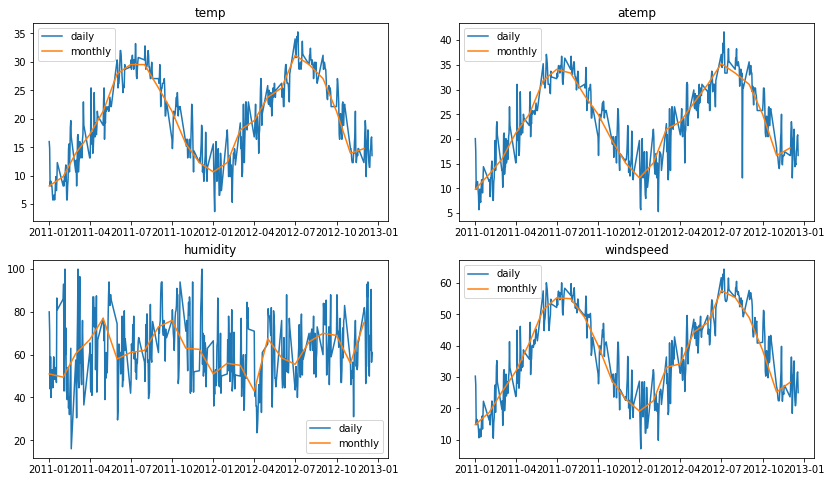

In [241]:
plt.figure(figsize=(14, 8))

for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    plt.title(col)
    plt.plot(graph_date_day['date'], graph_date_day[col], label='daily')
    plt.plot(graph_date_month['date'], graph_date_month[col], label='monthly')
    plt.legend()

#### 如果windspeed是不經處理過的資料呢?

In [246]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['date'] = train['datetime'].dt.date
train['week'] = train['datetime'].dt.dayofweek

In [247]:
graph_date_day_origin = train.groupby(['year', 'month', 'date'], as_index=False).agg({'week':'min', 'temp':'median', 'atemp':'median', 'humidity':'median', 'windspeed':'median'})
graph_date_month_origin = train.groupby(['year', 'month'], as_index=False).agg({'date':'min', 'week':'min', 'temp':'median', 'atemp':'median', 'humidity':'median', 'windspeed':'median'})

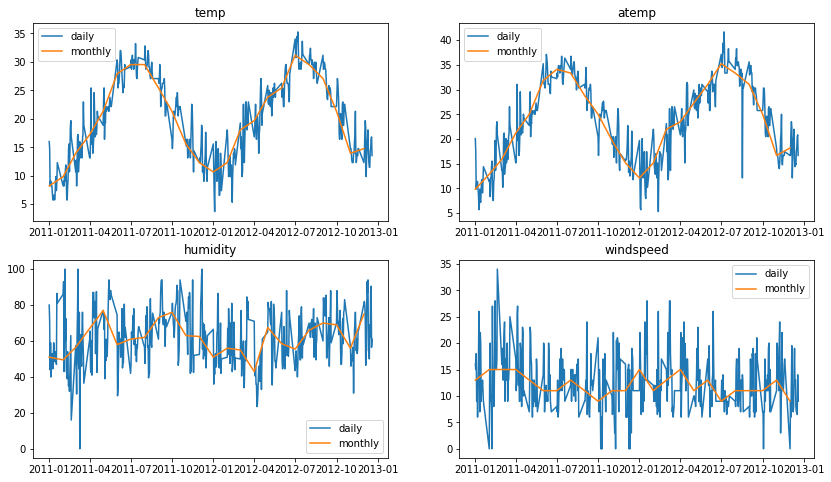

In [248]:
plt.figure(figsize=(14, 8))

for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    plt.title(col)
    plt.plot(graph_date_day_origin['date'], graph_date_day_origin[col], label='daily')
    plt.plot(graph_date_month_origin['date'], graph_date_month_origin[col], label='monthly')
    plt.legend()

### 來看各項數值與count的關係

#### 有temp、atemp、humidity、windseed等四項

In [199]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']

#### 可以看到各項數值分布與count的關係

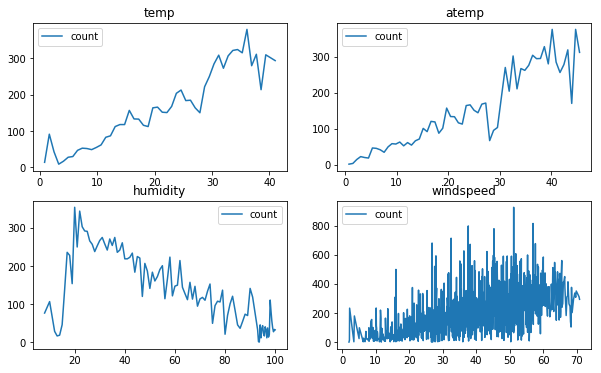

In [228]:
plt.figure(figsize=(10, 6))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    plt.title(col)
    plt.plot(train_pre.groupby([col]).agg({'count':'median'}).index, train_pre.groupby([col]).agg({'count':'median'})['count'])
    plt.legend()

In [249]:
train_pre.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,week,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,62.081482,37.376320,36.021955,155.552177,191.574132,11.541613,6.521495,3.013963,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.105562,14.327794,49.960477,151.039033,181.144454,6.915838,3.444373,2.004585,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,8.000000,2.022334,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,25.446732,4.000000,36.000000,42.000000,6.000000,4.000000,1.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,37.320834,17.000000,118.000000,145.000000,12.000000,7.000000,3.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,78.000000,49.506882,49.000000,222.000000,284.000000,18.000000,10.000000,5.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,70.878500,367.000000,886.000000,977.000000,23.000000,12.000000,6.000000,2012.000000


### 看看weather、holiday、workingday與count的關係

In [261]:
train_pre.groupby('weather').mean()

,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,week,year
weather,,,,,,,,,,,,,,
1,2.497080,0.028365,0.672831,20.557122,23.994126,56.716770,37.670847,40.308676,164.928115,205.236791,11.733871,6.479283,3.083426,2011.501808
2,2.530346,0.032463,0.683486,19.614608,23.072414,69.170311,36.647239,30.785462,148.170078,178.955540,10.950953,6.631969,2.893084,2011.517996
3,2.509895,0.017462,0.739232,19.546356,22.753091,83.582458,37.340443,17.442375,101.403958,118.846333,11.873108,6.516880,2.834692,2011.449360
4,1.000000,0.000000,1.000000,8.200000,11.365000,86.000000,16.168214,6.000000,158.000000,164.000000,18.000000,1.000000,0.000000,2012.000000


In [255]:
train_pre.groupby('weather').mean()['count']

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

In [256]:
train_pre.groupby('holiday').mean()['count']

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

In [257]:
train_pre.groupby('workingday').mean()['count']

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

### 圖形化 :

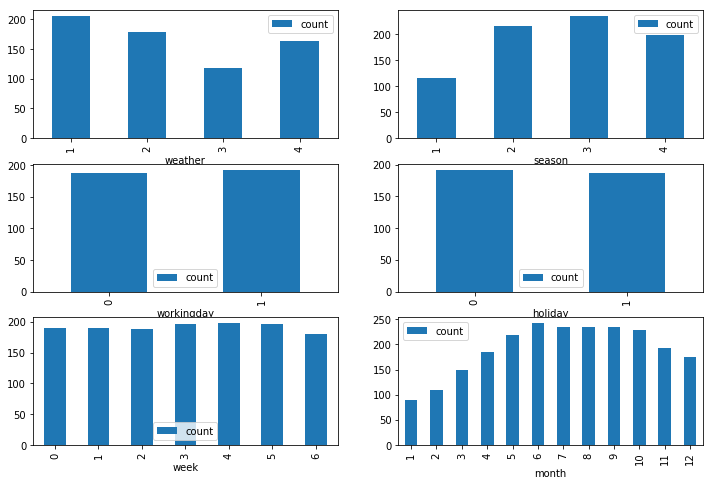

In [286]:
cols = ['weather', 'season', 'workingday', 'holiday', 'week', 'month']
plt.figure(figsize=(12, 8))
for index, col in enumerate(cols):
    plt.subplot(3, 2, index+1)
    train_pre.groupby(col).mean()['count'].plot(kind='bar')
    plt.legend()

### 從圖形看起來好像沒什麼關係，那從相關係數應該也會是一樣的結果

In [273]:
train_pre.corr()['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
windspeed     0.363975
year          0.260403
month         0.166862
season        0.163439
workingday    0.011594
week         -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.328872
Name: count, dtype: float64

### 把workingday, week, holiday拿掉

In [279]:
abs(train_pre.corr()['count'].sort_values(ascending=False))<0.3

count         False
registered    False
casual        False
hour          False
temp          False
atemp         False
windspeed     False
year           True
month          True
season         True
workingday     True
week           True
holiday        True
weather        True
humidity      False
Name: count, dtype: bool

### 根據連續值的temp, atemp, windspeed, humidity來做切割

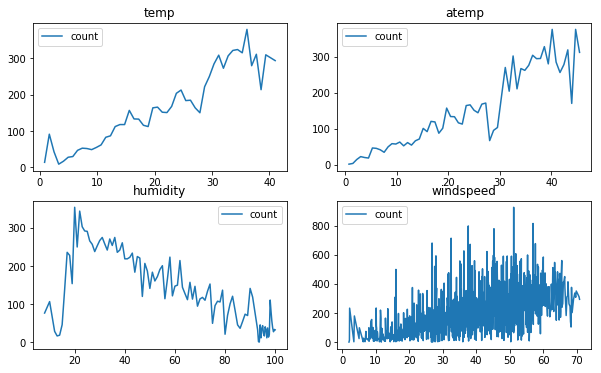

In [289]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']

plt.figure(figsize=(10, 6))
for index, col in enumerate(cols):
    plt.subplot(2, 2, index+1)
    plt.title(col)
    plt.plot(train_pre.groupby([col]).agg({'count':'median'}).index, train_pre.groupby([col]).agg({'count':'median'})['count'])
    plt.legend()

### 根據以上數據來做切割好了

### 使用函數重複計算

In [361]:
def cut_bin(data, col, bins):
    col_name = col + '_bin'
    data[col_name] = pd.cut(data[col], bins)
    data[col_name] = le.fit_transform(data[col_name])
    data.groupby(col_name).mean()['count'].plot(kind='bar')

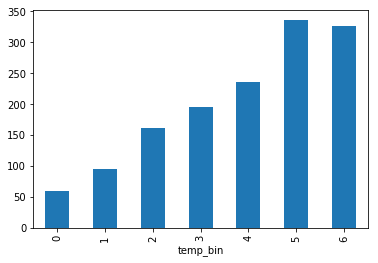

In [391]:
cut_bin(data, 'temp', 7)

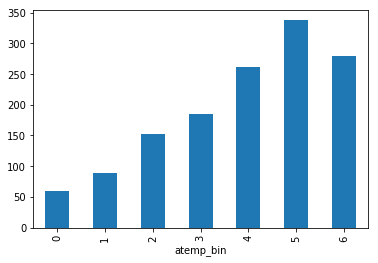

In [392]:
cut_bin(data, 'atemp', 7)

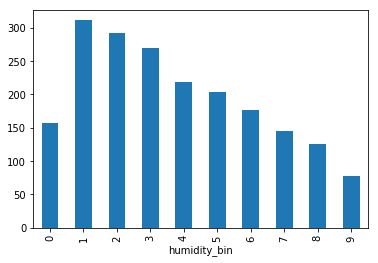

In [393]:
cut_bin(data, 'humidity', 10)

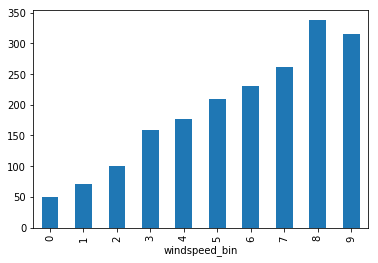

In [394]:
cut_bin(data, 'windspeed', 10)

In [395]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,hour,month,week,year,date,temp_bin,atemp_bin,humidity_bin,windspeed_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,18.968776,3.0,...,16.0,0,1,5,2011,2011-01-01,1,2,7,2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,17.455562,8.0,...,40.0,1,1,5,2011,2011-01-01,1,1,7,2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,17.455562,5.0,...,32.0,2,1,5,2011,2011-01-01,1,1,7,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,18.763545,3.0,...,13.0,3,1,5,2011,2011-01-01,1,2,7,2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,18.763545,0.0,...,1.0,4,1,5,2011,2011-01-01,1,2,7,2


In [425]:
train_pre = data.iloc[:y_shape, :]

In [426]:
train_pre.corr()['count'].sort_values(ascending=False)

count            1.000000
registered       0.970948
casual           0.690414
hour             0.400601
temp             0.394454
atemp            0.389784
temp_bin         0.389212
atemp_bin        0.376507
windspeed_bin    0.364224
windspeed        0.363975
year             0.260403
month            0.166862
season           0.163439
workingday       0.011594
week            -0.002283
holiday         -0.005393
weather         -0.128655
humidity_bin    -0.323239
humidity        -0.328872
Name: count, dtype: float64

In [427]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,hour,month,week,year,date,temp_bin,atemp_bin,humidity_bin,windspeed_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,18.968776,3.0,...,16.0,0,1,5,2011,2011-01-01,1,2,7,2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,17.455562,8.0,...,40.0,1,1,5,2011,2011-01-01,1,1,7,2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,17.455562,5.0,...,32.0,2,1,5,2011,2011-01-01,1,1,7,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,18.763545,3.0,...,13.0,3,1,5,2011,2011-01-01,1,2,7,2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,18.763545,0.0,...,1.0,4,1,5,2011,2011-01-01,1,2,7,2


### One Hot Encoding

In [416]:
def get_dummies(data, columns):
    data = pd.get_dummies(data, columns=[columns], prefix_sep=' ')
    return data

In [429]:
data = get_dummies(data, 'season')
data = get_dummies(data, 'month')
data = get_dummies(data, 'weather')

In [430]:
data.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'hour', 'week', 'year',
       'date', 'temp_bin', 'atemp_bin', 'humidity_bin', 'windspeed_bin',
       'season 1', 'season 2', 'season 3', 'season 4', 'month 1', 'month 2',
       'month 3', 'month 4', 'month 5', 'month 6', 'month 7', 'month 8',
       'month 9', 'month 10', 'month 11', 'month 12', 'weather 1', 'weather 2',
       'weather 3', 'weather 4'],
      dtype='object')

### 把datetime, holiday, workingday, casual, registered拿掉

In [438]:
data_test = data.copy()

In [439]:
data_test = data_test.drop(['datetime', 'holiday', 'workingday', 'casual', 'registered', 'date'], axis=1)

In [440]:
data_test.head()

,temp,atemp,humidity,windspeed,count,hour,week,year,temp_bin,atemp_bin,...,month 7,month 8,month 9,month 10,month 11,month 12,weather 1,weather 2,weather 3,weather 4
0,9.84,14.395,81.0,18.968776,16.0,0,5,2011,1,2,...,0,0,0,0,0,0,1,0,0,0
1,9.02,13.635,80.0,17.455562,40.0,1,5,2011,1,1,...,0,0,0,0,0,0,1,0,0,0
2,9.02,13.635,80.0,17.455562,32.0,2,5,2011,1,1,...,0,0,0,0,0,0,1,0,0,0
3,9.84,14.395,75.0,18.763545,13.0,3,5,2011,1,2,...,0,0,0,0,0,0,1,0,0,0
4,9.84,14.395,75.0,18.763545,1.0,4,5,2011,1,2,...,0,0,0,0,0,0,1,0,0,0


### temp, atemp, humidity, windspeed這四項需要做標準化處裡

In [441]:
def standard(data, cols):
    for col in cols:
        print('This is : ', col)
        mean = np.mean(data[col])
        std = np.std(data[col])
        data[col] = data[col].apply(lambda x : (x-mean)/std)
    return data

In [444]:
standard(data_test, cols)

This is :  temp
This is :  atemp
This is :  humidity
This is :  windspeed


,temp,atemp,humidity,windspeed,count,hour,week,year,temp_bin,atemp_bin,...,month 7,month 8,month 9,month 10,month 11,month 12,weather 1,weather 2,weather 3,weather 4
0,-1.334648,-1.093281,0.945555,-1.289026,16.0,0,5,2011,1,2,...,0,0,0,0,0,0,1,0,0,0
1,-1.438516,-1.181732,0.893472,-1.393143,40.0,1,5,2011,1,1,...,0,0,0,0,0,0,1,0,0,0
2,-1.438516,-1.181732,0.893472,-1.393143,32.0,2,5,2011,1,1,...,0,0,0,0,0,0,1,0,0,0
3,-1.334648,-1.093281,0.633060,-1.303147,13.0,3,5,2011,1,2,...,0,0,0,0,0,0,1,0,0,0
4,-1.334648,-1.093281,0.633060,-1.303147,1.0,4,5,2011,1,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,-1.230779,-1.269602,-0.148177,-1.238619,NaN,19,0,2012,1,1,...,0,0,0,0,0,1,0,1,0,0
6489,-1.230779,-1.269602,-0.148177,-1.238619,NaN,20,0,2012,1,1,...,0,0,0,0,0,1,0,1,0,0
6490,-1.230779,-1.269602,-0.148177,-1.238619,NaN,21,0,2012,1,1,...,0,0,0,0,0,1,1,0,0,0
6491,-1.230779,-1.181732,-0.356507,-1.248496,NaN,22,0,2012,1,1,...,0,0,0,0,0,1,1,0,0,0


### 將count拿掉就能開始預測了!

In [518]:
y_train = data_test.iloc[:y_shape, :]['count']
x_train = data_test.iloc[:y_shape, :]
x_test = data_test.iloc[y_shape:, :]

In [527]:
x_train = x_train.drop(['count'], axis=1)

In [519]:
x_test.isnull().sum()

temp                0
atemp               0
humidity            0
windspeed           0
count            6493
hour                0
week                0
year                0
temp_bin            0
atemp_bin           0
humidity_bin        0
windspeed_bin       0
season 1            0
season 2            0
season 3            0
season 4            0
month 1             0
month 2             0
month 3             0
month 4             0
month 5             0
month 6             0
month 7             0
month 8             0
month 9             0
month 10            0
month 11            0
month 12            0
weather 1           0
weather 2           0
weather 3           0
weather 4           0
dtype: int64

In [520]:
x_test = x_test.drop(['count'], axis=1)

## 搜尋最佳參數

In [450]:
from sklearn.model_selection import GridSearchCV

In [451]:
def get_best_model_and_accuracy(model, param, x, y):
    grid = GridSearchCV(model, param, error_score=0)
    grid.fit(x, y)
    print('Best accuracy : ', grid.best_score_)
    print('Best parameters : ', grid.best_params_)
    print('Average time to fit : ', round(grid.cv_results_['mean_fit_time'].mean(), 3))    

## 代入模型

In [453]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [528]:
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [531]:
xgb_params = {'n_estimators':[250, 500, 1000, 1500], 'max_depth':[1, 2, 3, 4], 'learning_rate':[0.6, 0.7, 0.8], 'min_child_weight':[3, 4, 5]}

In [532]:
get_best_model_and_accuracy(xgb, xgb_params, x_train, y_train)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py

Best accuracy :  0.8122320813802353
Best parameters :  {'learning_rate': 0.7, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 1000}
Average time to fit :  1.182


## 計算回歸的mse

In [533]:
from sklearn.metrics import mean_squared_error

In [534]:
def mse(x, y, model):
    model.fit(x, y)
    print('mse : ', mean_squared_error(y, model.predict(x)))

In [540]:
mse(x=x_train, y=y_train, model=XGBRegressor(n_estimators=1000, learning_rate=0.7, max_depth=2, min_child_weight=4))

mse :  2137.5490395106053


In [541]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.7, max_depth=2, min_child_weight=4)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_train)

In [537]:
def report_output(model, test, datetimecol):
    preds = model.predict(test)
    submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": preds
    })
    submission.to_csv('bike_predictions_RF.csv', index=False)

In [539]:
report_output(xgb, x_test, datetimecol)

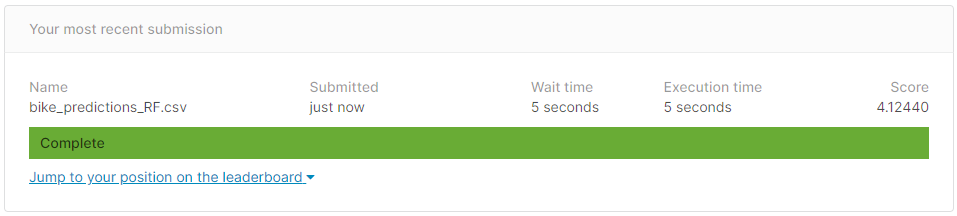

### 將y_train取log

In [542]:
y_train = np.log(y_train)

### 重新尋找參數

In [543]:
get_best_model_and_accuracy(xgb, xgb_params, x_train, y_train)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py

Best accuracy :  0.9016035175967079
Best parameters :  {'learning_rate': 0.8, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 500}
Average time to fit :  1.095


In [545]:
mse(x=x_train, y=y_train, model=XGBRegressor(n_estimators=500, learning_rate=0.8, max_depth=2, min_child_weight=4))

mse :  0.09972146296228182


In [546]:
xgb = XGBRegressor(n_estimators=1500, learning_rate=0.8, max_depth=2, min_child_weight=3)

In [547]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.8, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=nan, monotone_constraints='()',
       n_estimators=1500, n_jobs=8, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [548]:
def report_output_log(model, test, datetimecol):
    preds = model.predict(test)
    submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(preds)]
    })
    submission.to_csv('bike_predictions_RF.csv', index=False)

In [549]:
report_output_log(xgb, x_test, datetimecol)

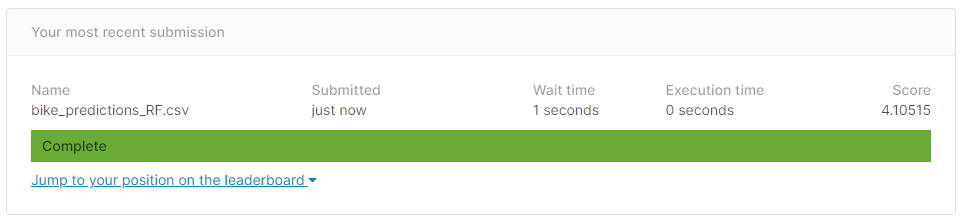

## RandomForestRegressor

In [550]:
rf = RandomForestRegressor()

In [551]:
rf_params = {'n_estimators':[500, 1000, 1500], 'max_depth':[2, 3, 4]}

In [504]:
get_best_model_and_accuracy(rf, rf_params, x_train, y_train)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link fo

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link fo

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link fo

Best accuracy :  0.994539450703395
Best parameters :  {'max_depth': 4, 'n_estimators': 1500}
Average time to fit :  6.611


In [552]:
mse(x=x_train, y=y_train, model=RandomForestRegressor(n_estimators=1500, max_depth=4))

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


mse :  0.458889225813836


### RandomForest Regressor

In [553]:
rf = RandomForestRegressor(n_estimators=1500, max_depth=4)

In [554]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [555]:
report_output_log(rf, x_test, datetimecol)

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
